In [46]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import calendar
import requests
from selenium import webdriver
from selenium.webdriver.common.by import By
import time
import wbdata
import datetime

In [37]:
# Initialize Selenium WebDriver
driver = webdriver.Chrome()  # Ensure you have the Chrome WebDriver installed and available in your PATH
driver.get("https://www.bnm.gov.my/monetary-stability/opr-decisions")

# Wait for the page to load and the table to render
time.sleep(5)  # Increase if the page takes longer to load fully

# Locate the table rows after JavaScript renders the content
table_rows = driver.find_elements(By.XPATH, "//table/tbody/tr")

# Extract data
data = []
for row in table_rows:
    cells = row.find_elements(By.TAG_NAME, "td")
    data.append([cell.text for cell in cells])

# Convert to DataFrame
df = pd.DataFrame(data, columns=["Date", "Change in OPR (%)", "New OPR Level (%)", "Monetary Policy Statement"])

# Close the driver
driver.quit()

In [38]:
df

,Date,Change in OPR (%),New OPR Level (%),Monetary Policy Statement
0,None,None,None,None
1,Date,Change in OPR (%),New OPR Level (%),Monetary Policy Statement
2,05 Sep 2024,0,3.00,View Statement
3,11 Jul 2024,0,3.00,View Statement
4,09 May 2024,0,3.00,View Statement
...,...,...,...,...
126,25 May 2005,0,2.70,View Statement
127,28 Feb 2005,0,2.70,View Statement
128,30 Nov 2004,0,2.70,View Statement
129,25 Aug 2004,0,2.70,View Statement


In [54]:
opr_df = df.copy()
opr_df = opr_df.drop([0, 1])  # Drop the first two rows

# Reset the index
opr_df.reset_index(drop=True, inplace=True)

# Display the DataFrame
opr_df

,Date,Change in OPR (%),New OPR Level (%),Monetary Policy Statement
0,05 Sep 2024,0,3.00,View Statement
1,11 Jul 2024,0,3.00,View Statement
2,09 May 2024,0,3.00,View Statement
3,07 Mar 2024,0,3.00,View Statement
4,24 Jan 2024,0,3.00,View Statement
...,...,...,...,...
124,25 May 2005,0,2.70,View Statement
125,28 Feb 2005,0,2.70,View Statement
126,30 Nov 2004,0,2.70,View Statement
127,25 Aug 2004,0,2.70,View Statement


In [55]:
opr_df = opr_df.copy()
opr_df = opr_df.drop(columns=['Change in OPR (%)', 'Monetary Policy Statement'])
opr_df['Date'] = pd.to_datetime(opr_df['Date'], errors='coerce', dayfirst=True)
opr_df = opr_df.rename(columns={'Date':'date', 'New OPR Level (%)':'OPR (%)'})
opr_df.info()
opr_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date     129 non-null    datetime64[ns]
 1   OPR (%)  129 non-null    object        
dtypes: datetime64[ns](1), object(1)
memory usage: 2.1+ KB


,date,OPR (%)
0,2024-09-05,3.00
1,2024-07-11,3.00
2,2024-05-09,3.00
3,2024-03-07,3.00
4,2024-01-24,3.00
...,...,...
124,2005-05-25,2.70
125,2005-02-28,2.70
126,2004-11-30,2.70
127,2004-08-25,2.70


In [56]:
opr_df_cleaned = opr_df.copy()
opr_df_cleaned['date'] = opr_df_cleaned['date'].apply(lambda x: x.replace(day=1) if pd.notnull(x) else None)
opr_df_cleaned

,date,OPR (%)
0,2024-09-01,3.00
1,2024-07-01,3.00
2,2024-05-01,3.00
3,2024-03-01,3.00
4,2024-01-01,3.00
...,...,...
124,2005-05-01,2.70
125,2005-02-01,2.70
126,2004-11-01,2.70
127,2004-08-01,2.70


In [57]:
date_range = pd.date_range(start="2004-05-01", end="2024-09-01", freq="MS")  # MS for month start

# Convert to DataFrame
date_df = pd.DataFrame(date_range, columns=["date"])

# Merge with your original DataFrame to fill in missing dates
opr_df_full = pd.merge(date_df, opr_df_cleaned, on="date", how="left")
opr_df_full

,date,OPR (%)
0,2004-05-01,2.70
1,2004-06-01,NaN
2,2004-07-01,NaN
3,2004-08-01,2.70
4,2004-09-01,NaN
...,...,...
240,2024-05-01,3.00
241,2024-06-01,NaN
242,2024-07-01,3.00
243,2024-08-01,NaN


In [58]:
opr_df_fill = opr_df_full.copy()
opr_df_fill = opr_df_fill.bfill()
opr_df_fill

,date,OPR (%)
0,2004-05-01,2.70
1,2004-06-01,2.70
2,2004-07-01,2.70
3,2004-08-01,2.70
4,2004-09-01,2.70
...,...,...
240,2024-05-01,3.00
241,2024-06-01,3.00
242,2024-07-01,3.00
243,2024-08-01,3.00


In [59]:
opr_df_fill.to_csv('C:/Users/kh/Desktop/mbb_stock_prediction_analysis/data/MY_opr.csv', index=False)

In [2]:
# Define the ticker symbol for Maybank Berhad
ticker_symbol = "1155.KL"

# Download historical data for Maybank Berhad
mbb_data = yf.download(ticker_symbol, start="2004-07-01", end="2024-08-01")

# Display the first few rows of the dataset
mbb_data.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-07-01,7.256431,7.328277,7.184585,7.256431,2.196594,2016957
2004-07-02,7.256431,7.328277,7.184585,7.328277,2.218342,1104447
2004-07-05,7.256431,7.615660,7.256431,7.543814,2.283587,5489669
2004-07-06,7.543814,7.759352,7.543814,7.615660,2.305336,6339544
2004-07-07,7.615660,7.615660,7.471968,7.543814,2.283587,4070241


In [3]:
# Summary statistics of the dataset
mbb_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,4972.000000,4972.000000,4972.000000,4972.000000,4972.000000,4.972000e+03
mean,8.472266,8.527618,8.419473,8.474965,4.720422,8.344831e+06
std,1.123968,1.119108,1.129090,1.124700,1.859177,6.351584e+06
min,3.556369,3.574331,3.538408,3.574331,1.410368,0.000000e+00
25%,8.030000,8.070000,7.974889,8.030000,3.016903,4.591000e+06
50%,8.620000,8.660000,8.560000,8.620000,4.631227,7.077000e+06
75%,9.110000,9.160000,9.060000,9.120000,6.061805,1.042262e+07
max,10.880000,11.080000,10.820000,10.880000,9.949086,1.675338e+08


In [4]:
mbb_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4972 entries, 2004-07-01 to 2024-07-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       4972 non-null   float64
 1   High       4972 non-null   float64
 2   Low        4972 non-null   float64
 3   Close      4972 non-null   float64
 4   Adj Close  4972 non-null   float64
 5   Volume     4972 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 271.9 KB


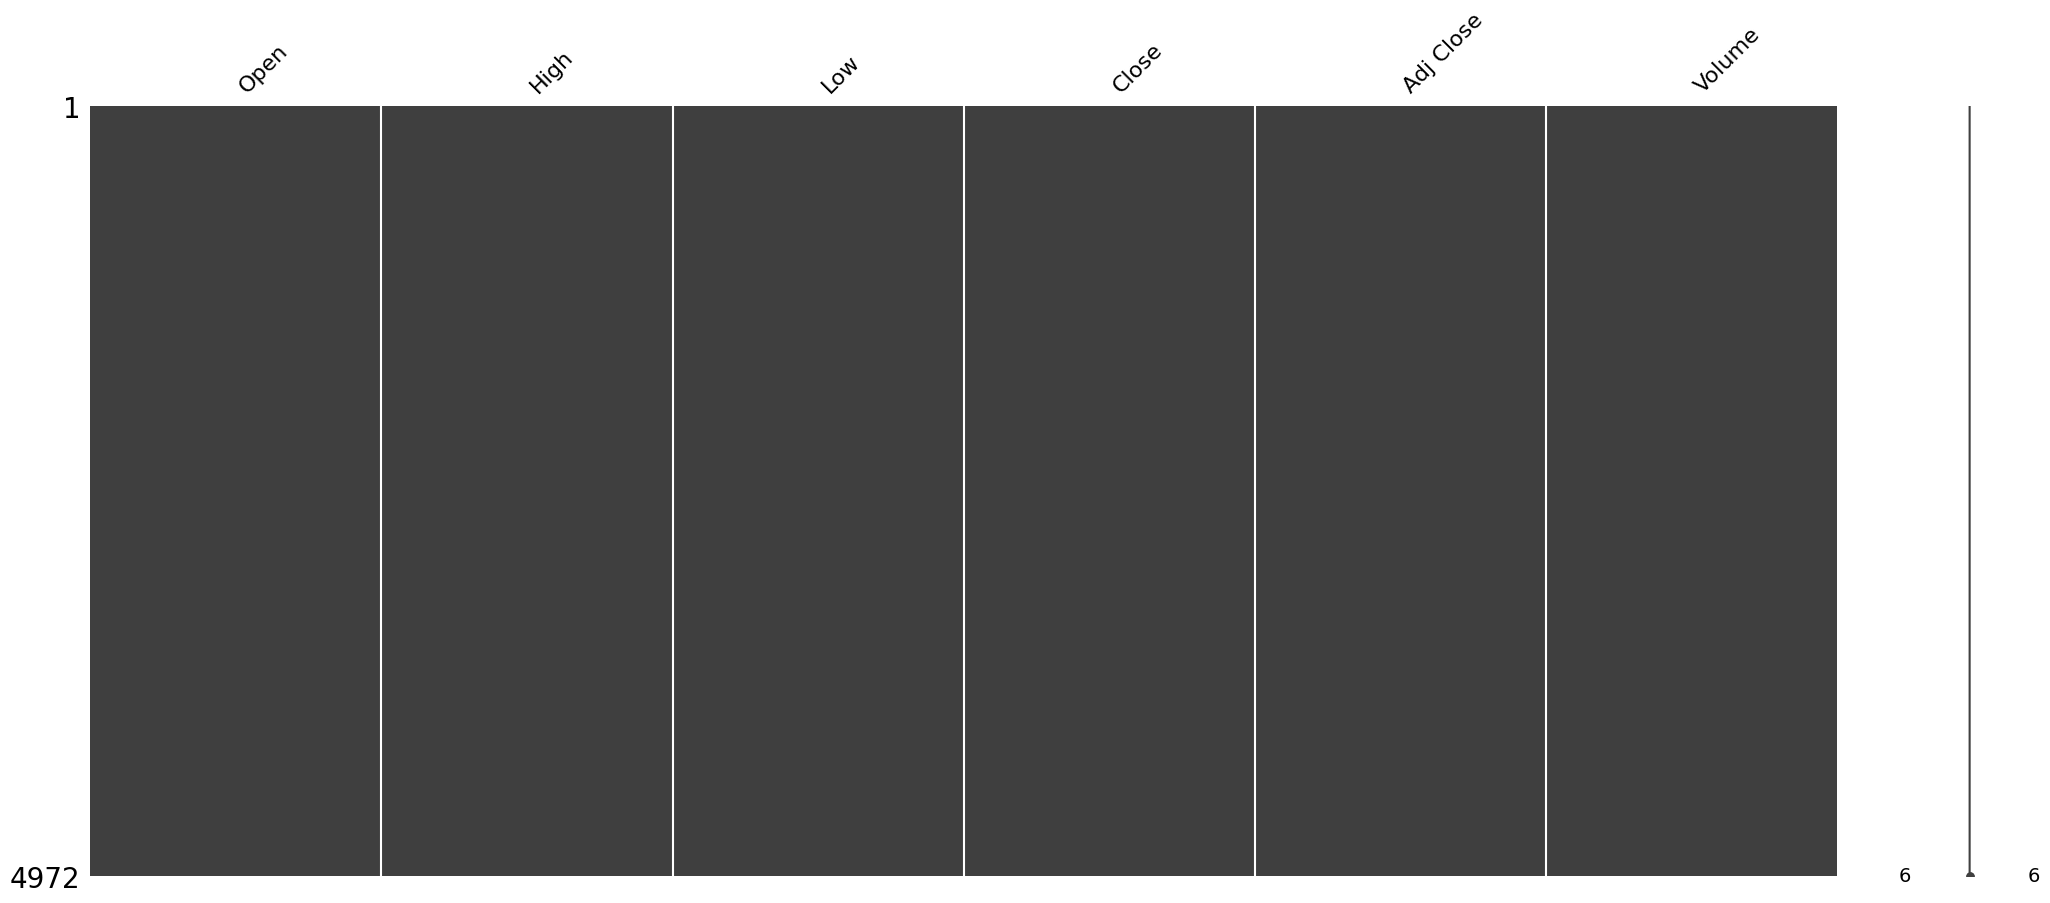

In [5]:
# Check for missing data
mbb_data.isnull().sum()

# Visualize missing data
msno.matrix(mbb_data)
plt.show()

In [6]:
mbb_data.index

DatetimeIndex(['2004-07-01', '2004-07-02', '2004-07-05', '2004-07-06',
               '2004-07-07', '2004-07-08', '2004-07-09', '2004-07-12',
               '2004-07-13', '2004-07-14',
               ...
               '2024-07-18', '2024-07-19', '2024-07-22', '2024-07-23',
               '2024-07-24', '2024-07-25', '2024-07-26', '2024-07-29',
               '2024-07-30', '2024-07-31'],
              dtype='datetime64[ns]', name='Date', length=4972, freq=None)

In [7]:
# get the total days for 2 years data
full_date_range = pd.date_range(start=mbb_data.index.min(), end=mbb_data.index.max(), freq='D')
full_mbb_data = mbb_data.reindex(full_date_range)
full_mbb_data.index

DatetimeIndex(['2004-07-01', '2004-07-02', '2004-07-03', '2004-07-04',
               '2004-07-05', '2004-07-06', '2004-07-07', '2004-07-08',
               '2004-07-09', '2004-07-10',
               ...
               '2024-07-22', '2024-07-23', '2024-07-24', '2024-07-25',
               '2024-07-26', '2024-07-27', '2024-07-28', '2024-07-29',
               '2024-07-30', '2024-07-31'],
              dtype='datetime64[ns]', length=7336, freq='D')

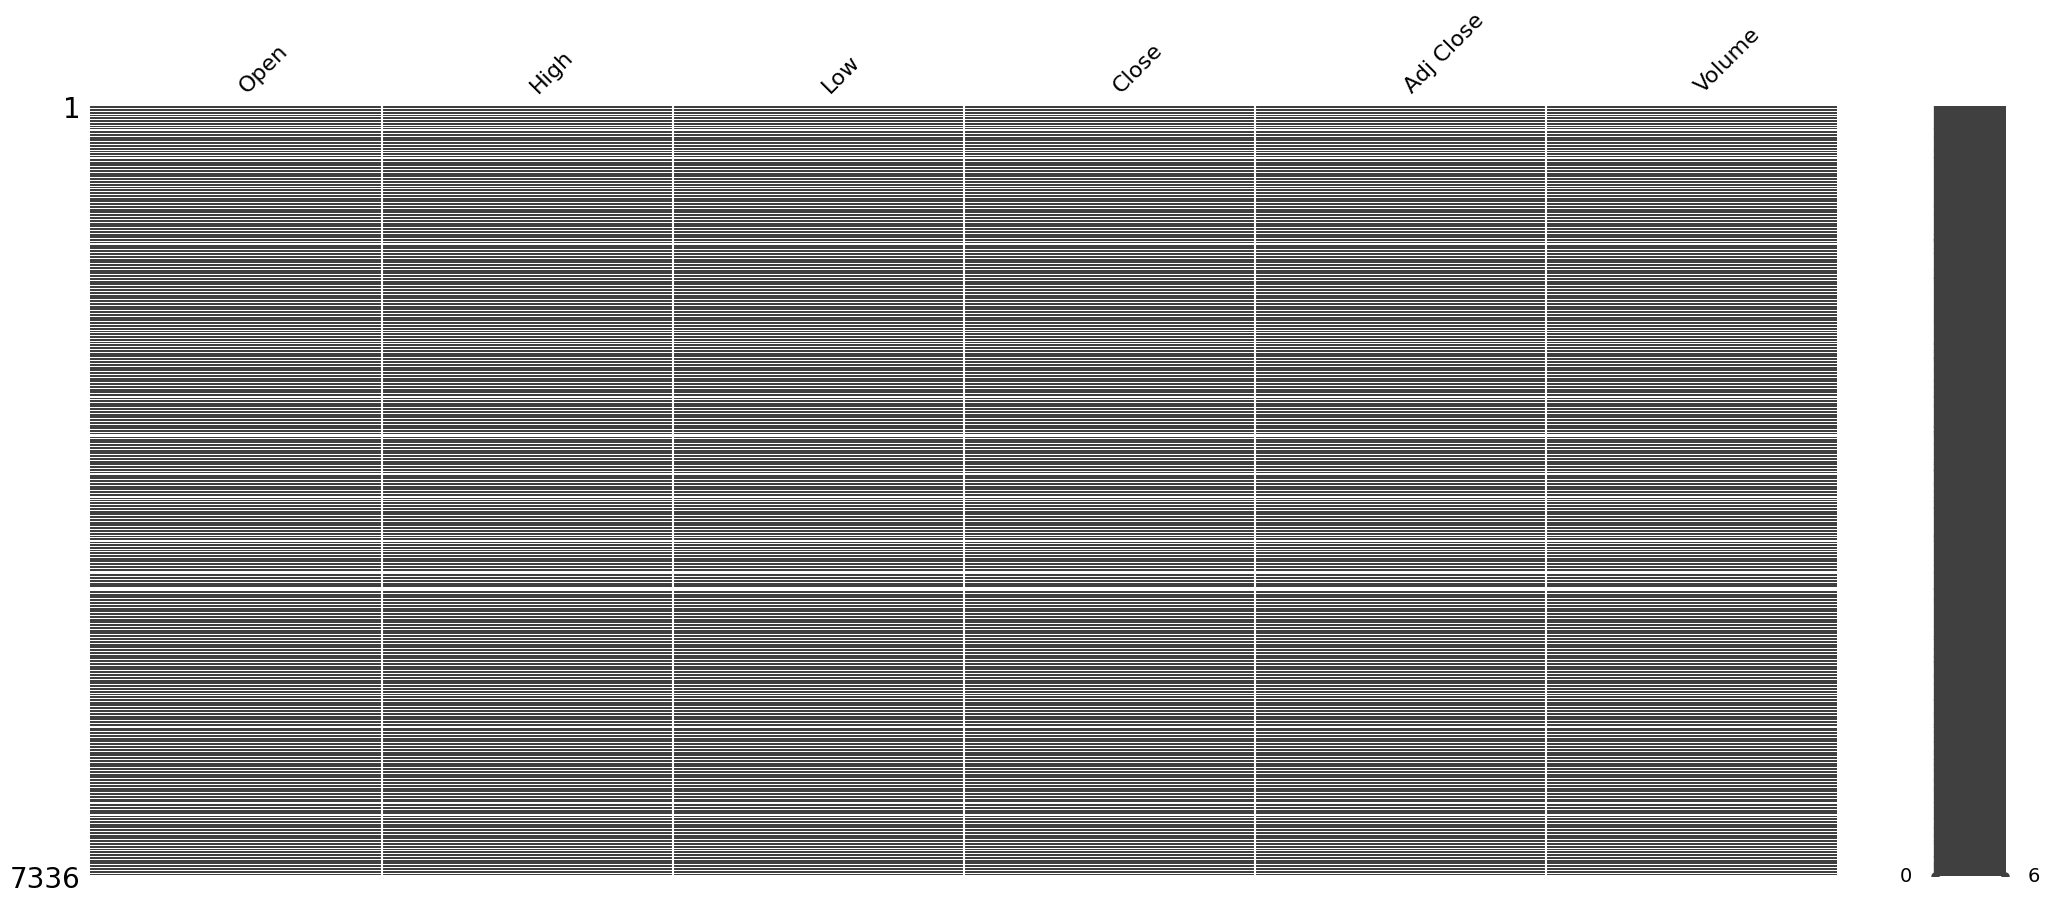

In [8]:
# Check for missing data
full_mbb_data.isnull().sum()

# Visualize missing data
msno.matrix(full_mbb_data)
plt.show()

In [9]:
def plot_calendar_with_missing_dates(year, missing_dates):
    fig, axs = plt.subplots(4, 3, figsize=(16, 12))  # 4 rows, 3 columns (one for each month)
    plt.subplots_adjust(hspace=0.5)
    
    # Iterate over months (1 to 12)
    for month in range(1, 13):
        ax = axs[(month-1)//3, (month-1)%3]  # Position on the 4x3 grid
        month_name = calendar.month_name[month]
        
        # Get calendar for the current month
        cal = calendar.monthcalendar(year, month)  # Matrix with day numbers and zeros for blank spaces
        ax.set_title(month_name, fontsize=14)
        
        # Plot days of the week at the top
        days_of_week = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
        ax.set_xticks(np.arange(7))
        ax.set_xticklabels(days_of_week)
        
        # Plot the calendar days
        for week_idx, week in enumerate(cal):
            for day_idx, day in enumerate(week):
                if day == 0:
                    continue  # Skip blanks (days that belong to another month)
                date = pd.Timestamp(year=year, month=month, day=day)
                
                # Check if the date is missing and color accordingly
                if date in missing_dates:
                    color = 'yellow'
                    edgecolor = 'red'
                else:
                    color = 'lightgray'
                    edgecolor = 'black'
                
                # Add day number to the calendar
                ax.text(day_idx, week_idx, str(day), ha='center', va='center', 
                        bbox=dict(facecolor=color, edgecolor=edgecolor, boxstyle='round,pad=0.3'))
        
        # Set limits, hide ticks and labels
        ax.set_xlim(-0.5, 6.5)
        ax.set_ylim(len(cal)-0.5, -0.5)
        ax.set_xticks(np.arange(7))
        ax.set_yticks([])
    
    plt.suptitle(f'Calendar for {year} with Missing Dates Highlighted', fontsize=16)
    plt.show()

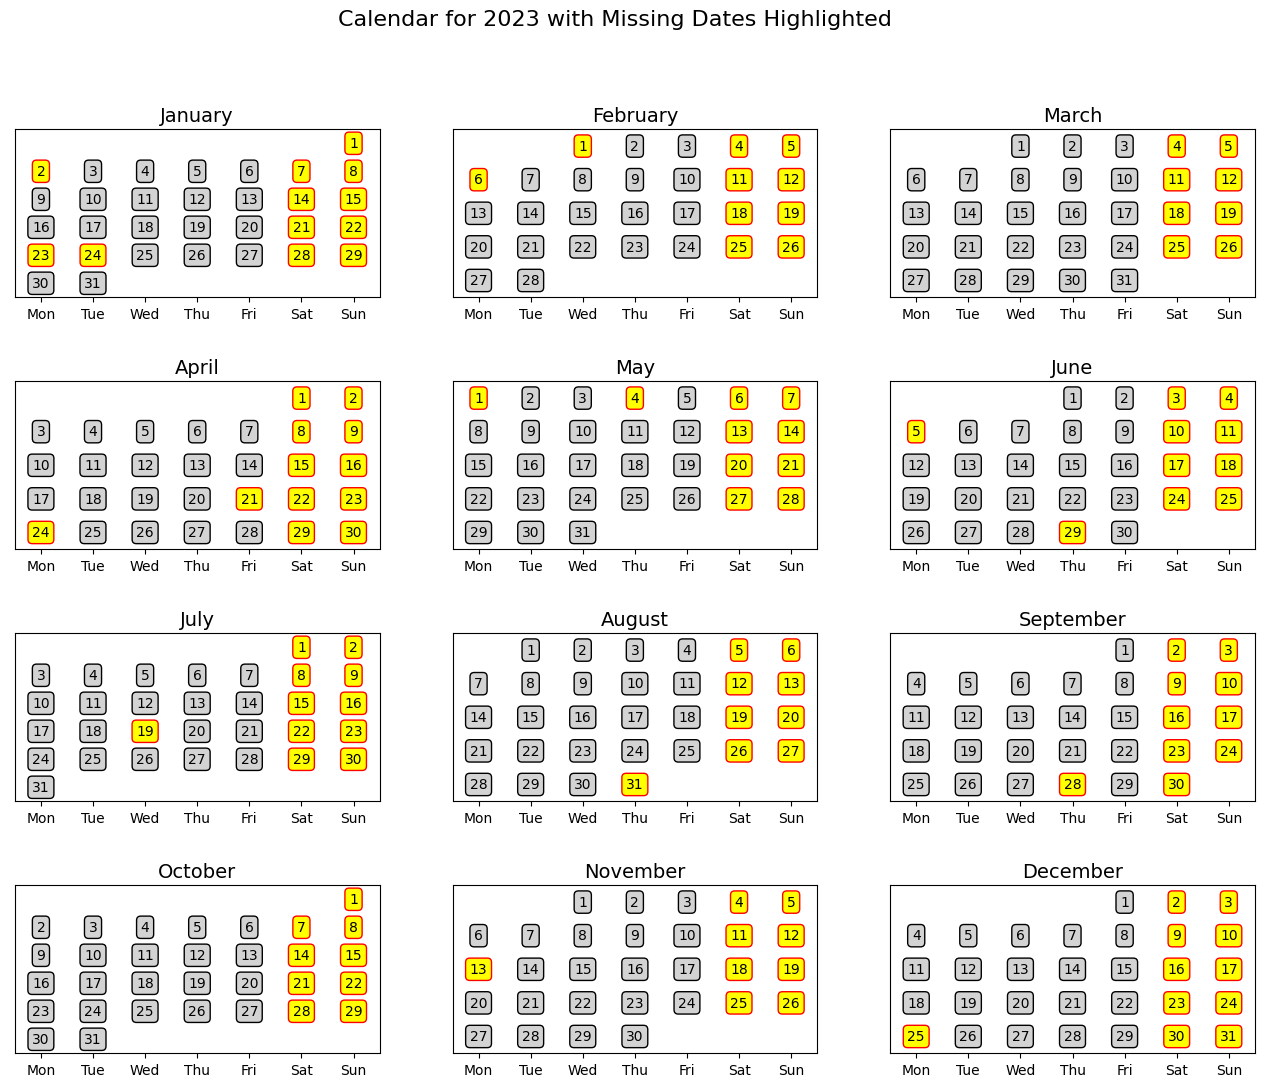

In [10]:
year = 2023
date_range_2023 = pd.date_range(start=f'{year}-01-01', end=f'{year}-12-31')
missing_dates = date_range_2023.difference(mbb_data.index)
plot_calendar_with_missing_dates(year=year, missing_dates=missing_dates)


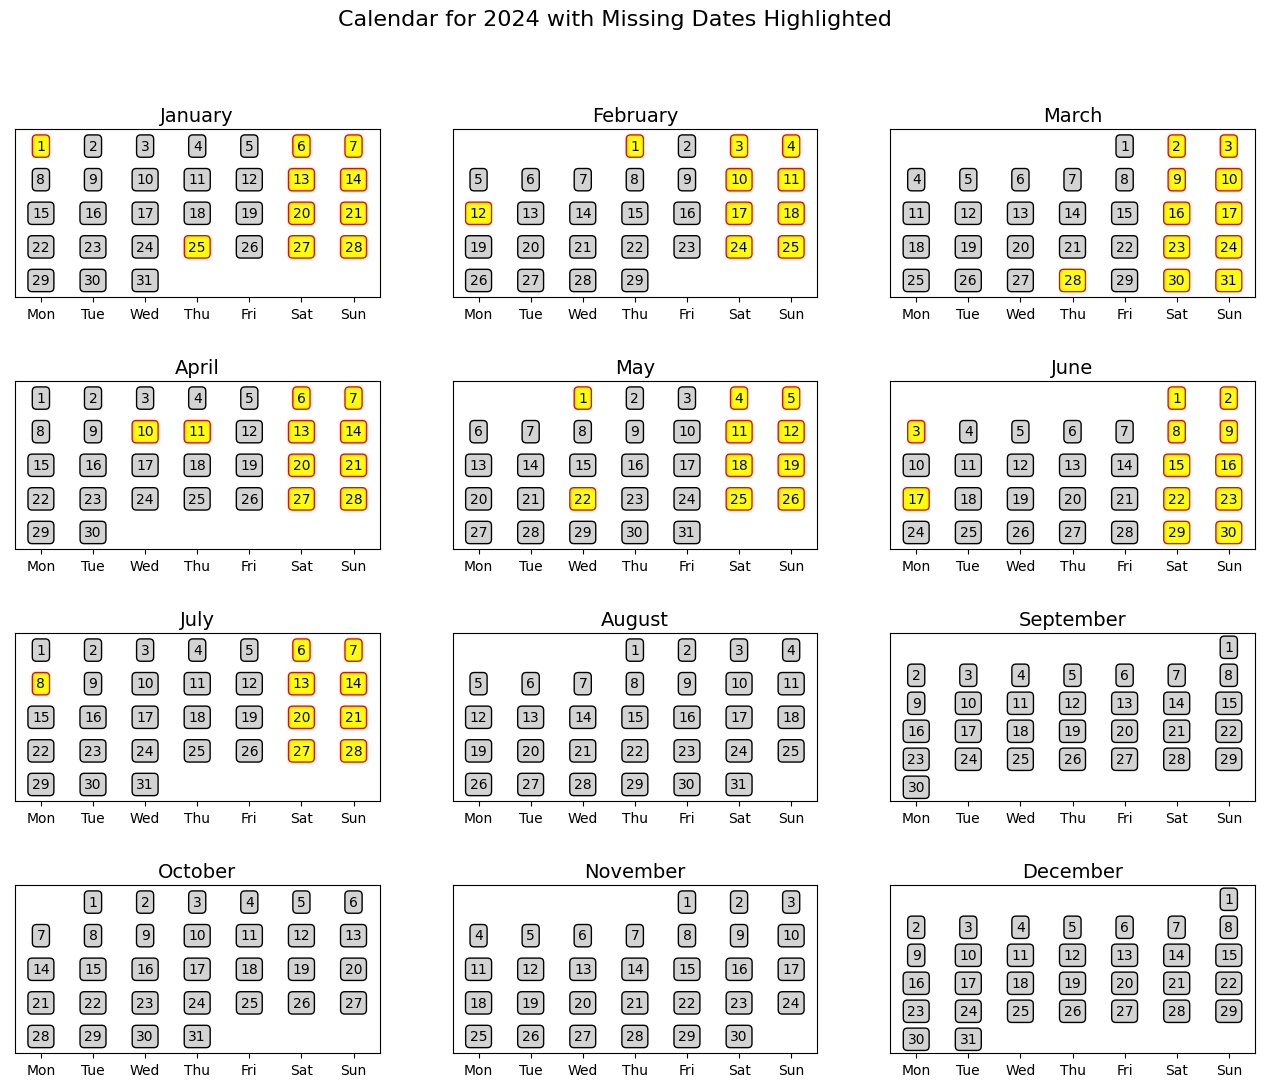

In [11]:
year = 2024
date_range_2024 = pd.date_range(start=f'{year}-01-01', end=f'{year}-07-31')
missing_dates = date_range_2024.difference(mbb_data.index)
plot_calendar_with_missing_dates(year=year, missing_dates=missing_dates)


As cross-check with the public holiday in Malaysia 2023, the missing dates are the public holidays hence the Bursa Malaysia is not operating. Please refer the official link here to check the Malaysia's public holiday in 2023. https://publicholidays.com.my/2023-dates/. To solve the missing dates issue, a backward-fill approach is applied to fill the missing values.

In [12]:
full_mbb_data[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']] = full_mbb_data[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']].bfill()
full_mbb_data.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [13]:
full_mbb_data.tail(10)

,Open,High,Low,Close,Adj Close,Volume
2024-07-22,10.10,10.12,10.04,10.06,9.793327,7268000.0
2024-07-23,10.08,10.14,10.06,10.10,9.832268,9008600.0
2024-07-24,10.10,10.14,10.08,10.12,9.851737,5658900.0
2024-07-25,10.08,10.14,10.08,10.14,9.871207,2729300.0
2024-07-26,10.16,10.16,10.10,10.14,9.871207,7445100.0
2024-07-27,10.14,10.20,10.14,10.20,9.929616,6957200.0
2024-07-28,10.14,10.20,10.14,10.20,9.929616,6957200.0
2024-07-29,10.14,10.20,10.14,10.20,9.929616,6957200.0
2024-07-30,10.24,10.26,10.08,10.08,9.812798,14123900.0
2024-07-31,10.10,10.22,10.08,10.22,9.949086,12304400.0


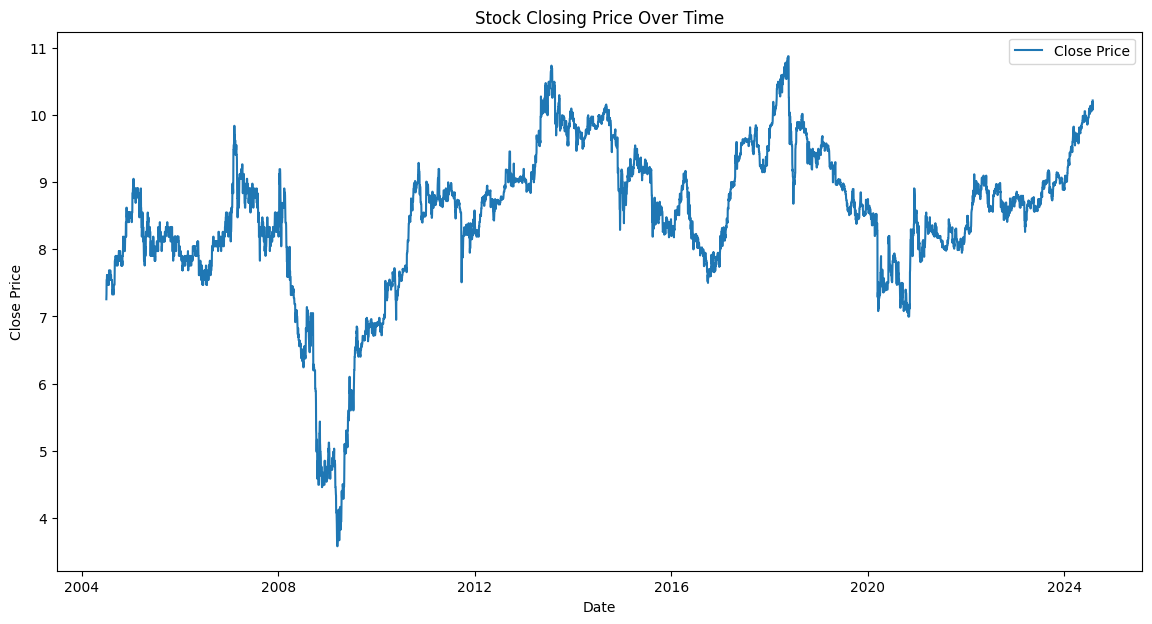

In [14]:
plt.figure(figsize=(14, 7))
plt.plot(full_mbb_data.index, full_mbb_data['Close'], label='Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Stock Closing Price Over Time')
plt.legend()
plt.show()


In [15]:
# mbb_data['SMA_50'] = mbb_data['Close'].rolling(window=50).mean()
# mbb_data['SMA_200'] = mbb_data['Close'].rolling(window=200).mean()

# plt.figure(figsize=(14, 7))
# plt.plot(mbb_data.index, mbb_data['Close'], label='Close Price')
# plt.plot(mbb_data.index, mbb_data['SMA_50'], label='50-Day SMA', color='orange')
# plt.plot(mbb_data.index, mbb_data['SMA_200'], label='200-Day SMA', color='red')
# plt.xlabel('Date')
# plt.ylabel('Price')
# plt.title('MBB Stock Closing Price with Moving Averages')
# plt.legend()
# plt.show()


In [16]:
data = full_mbb_data.copy()

# Medium and Long-Term Moving Averages
data['SMA_50'] = data['Close'].rolling(window=50).mean()  # Medium-term (~1 year)
data['SMA_200'] = data['Close'].rolling(window=200).mean()  # Long-term (~4 years)

# Use longer EMAs for long-term momentum tracking
data['EMA_26'] = data['Close'].ewm(span=26, adjust=False).mean()
data['EMA_52'] = data['Close'].ewm(span=52, adjust=False).mean()

# Calculate MACD for medium to long-term trends
data['MACD'] = data['EMA_26'] - data['EMA_52']
data['MACD_Signal'] = data['MACD'].ewm(span=9, adjust=False).mean()


In [17]:
# Calculate 14-week RSI
delta = data['Close'].diff(1)
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)
avg_gain = gain.rolling(window=14).mean()
avg_loss = loss.rolling(window=14).mean()
rs = avg_gain / avg_loss
data['RSI'] = 100 - (100 / (1 + rs))

In [18]:
# Calculate Bollinger Bands using the 50-week SMA
data['BB_upper'] = data['SMA_50'] + (data['Close'].rolling(window=50).std() * 2)
data['BB_lower'] = data['SMA_50'] - (data['Close'].rolling(window=50).std() * 2)


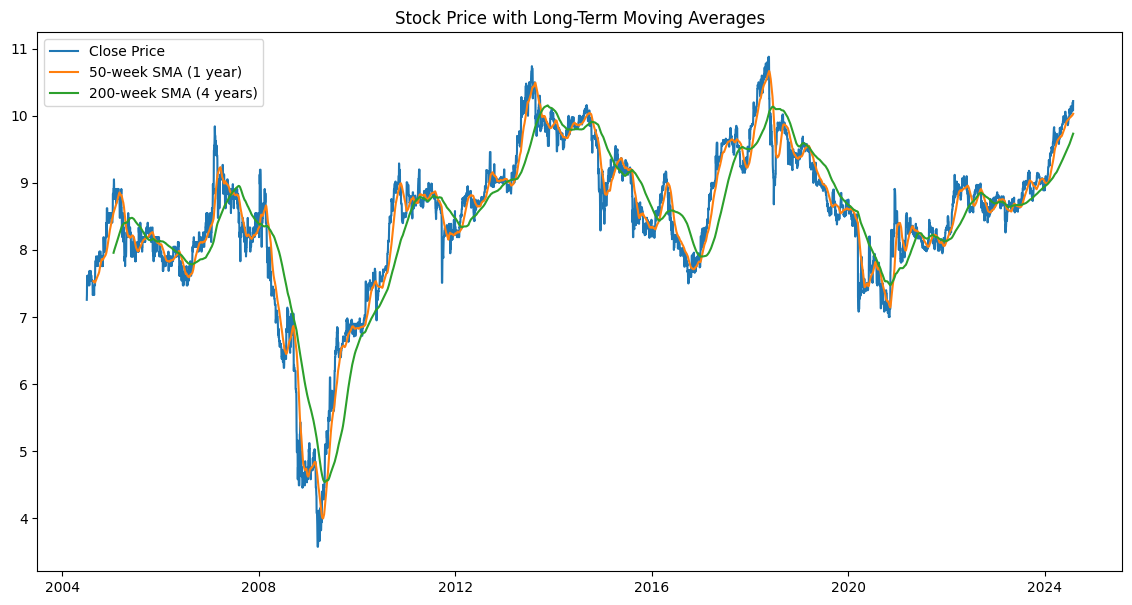

In [19]:
# Long-term MA
plt.figure(figsize=(14,7))
plt.plot(data['Close'], label='Close Price')
plt.plot(data['SMA_50'], label='50-week SMA (1 year)')
plt.plot(data['SMA_200'], label='200-week SMA (4 years)')
plt.title('Stock Price with Long-Term Moving Averages')
plt.legend()
plt.show()

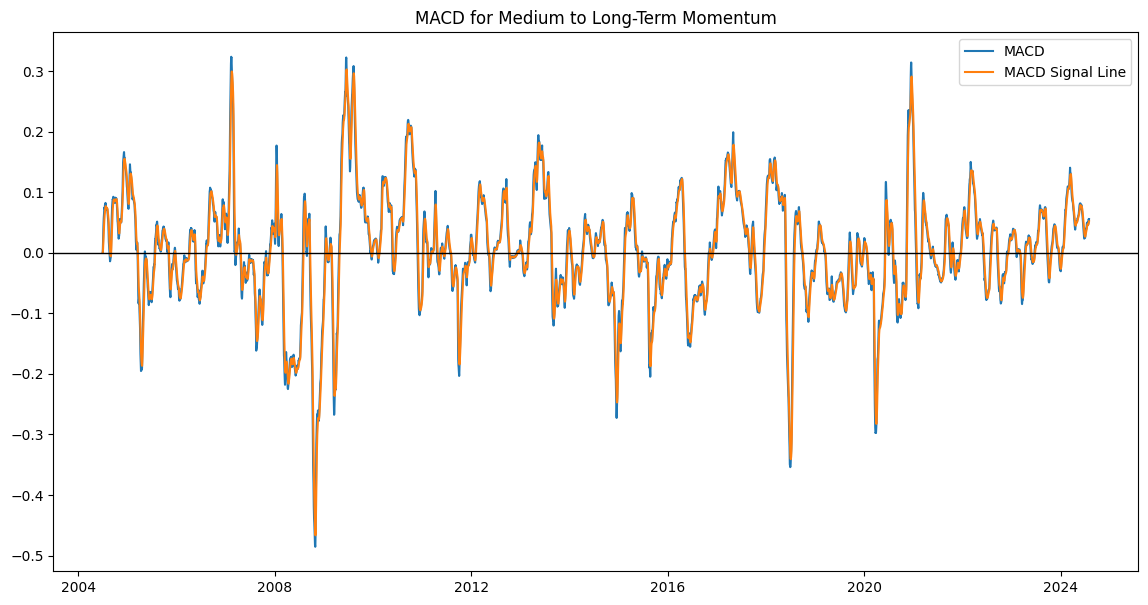

In [20]:
# MACD 
plt.figure(figsize=(14,7))
plt.plot(data['MACD'], label='MACD')
plt.plot(data['MACD_Signal'], label='MACD Signal Line')
plt.axhline(0, color='black', lw=1)
plt.title('MACD for Medium to Long-Term Momentum')
plt.legend()
plt.show()

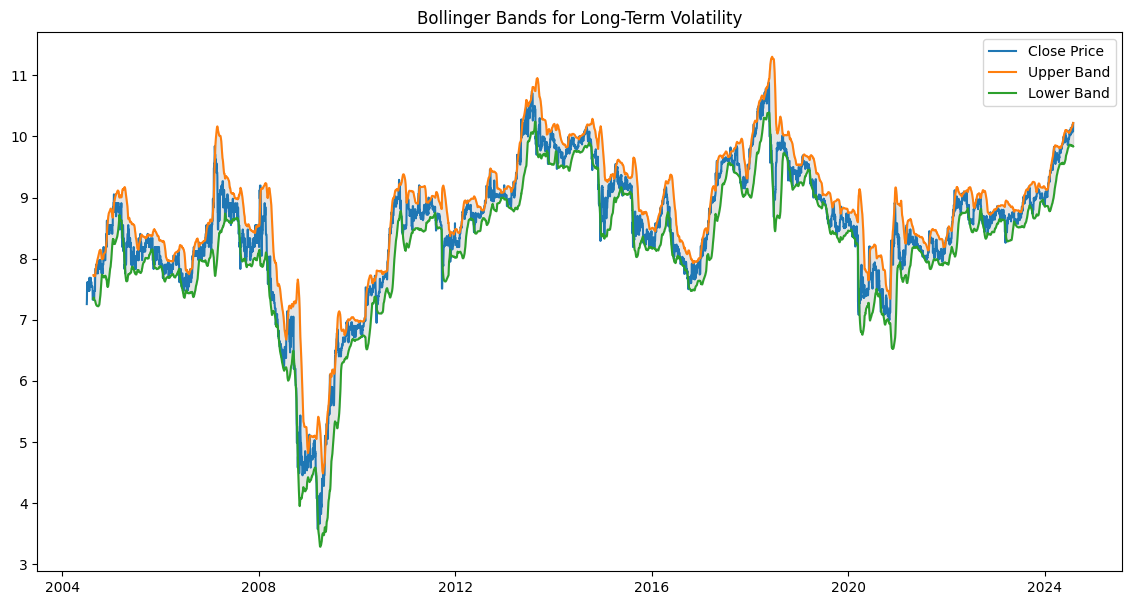

In [21]:
# Bollinger Bands
plt.figure(figsize=(14,7))
plt.plot(data['Close'], label='Close Price')
plt.plot(data['BB_upper'], label='Upper Band')
plt.plot(data['BB_lower'], label='Lower Band')
plt.fill_between(data.index, data['BB_upper'], data['BB_lower'], color='gray', alpha=0.2)
plt.title('Bollinger Bands for Long-Term Volatility')
plt.legend()
plt.show()

In [22]:
# Calculate Golden Cross and Death Cross
data['Golden_Cross'] = (data['SMA_50'] > data['SMA_200']).astype(int)
data['Death_Cross'] = (data['SMA_50'] < data['SMA_200']).astype(int)

Sharpe Ratio: 0.009679993324544436


In [29]:
data = mbb_data.copy()
# Assume a risk-free rate (annualized)
risk_free_rate = 0.03  # Example: 3% annual risk-free rate (you can adjust this based on your assumption)

# Step 1: Calculate Daily Returns (you already have this)
data['Returns'] = data['Close'].pct_change()

# Step 2: Convert risk-free rate to daily (assuming 252 trading days per year)
daily_risk_free_rate = (1 + risk_free_rate) ** (1/252) - 1  # Approximate daily risk-free return

# Step 3: Calculate the excess return (return - risk-free rate)
data['Excess_Return'] = data['Returns'] - daily_risk_free_rate

# Step 4: Calculate the Sharpe Ratio
mean_excess_return = data['Excess_Return'].mean()
std_return = data['Returns'].std()

sharpe_ratio = mean_excess_return / std_return
print(f'Sharpe Ratio: {sharpe_ratio}')


Sharpe Ratio: 0.0014491683425527707


In [23]:
# Filter for the last one year
one_year_data = data.loc['2023-01-01':'2023-12-31']
import plotly.graph_objects as go

# Create candlestick chart for one-year data
fig = go.Figure(data=[go.Candlestick(x=one_year_data.index,
                                     open=one_year_data['Open'],
                                     high=one_year_data['High'],
                                     low=one_year_data['Low'],
                                     close=one_year_data['Close'])])

# Overlay the 50-week and 200-week SMAs
fig.add_trace(go.Scatter(x=one_year_data.index, y=one_year_data['SMA_50'], mode='lines', name='50-week SMA'))
fig.add_trace(go.Scatter(x=one_year_data.index, y=one_year_data['SMA_200'], mode='lines', name='200-week SMA'))

# Add title and labels
fig.update_layout(title='Stock Price and Moving Averages (One Year)', xaxis_title='Date', yaxis_title='Price')
fig.show()

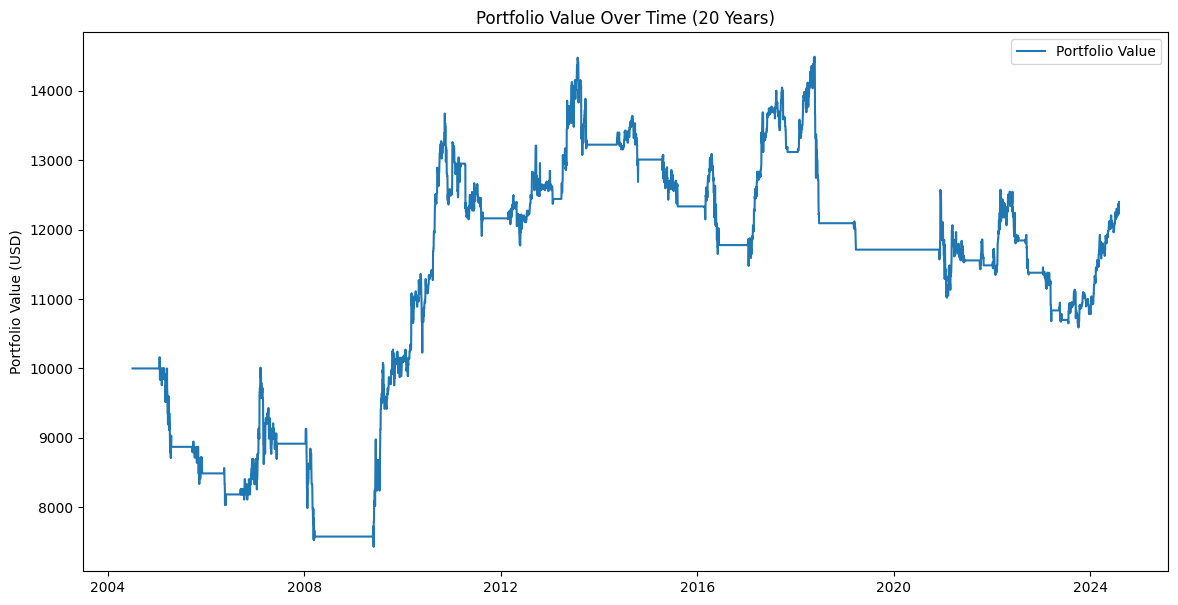

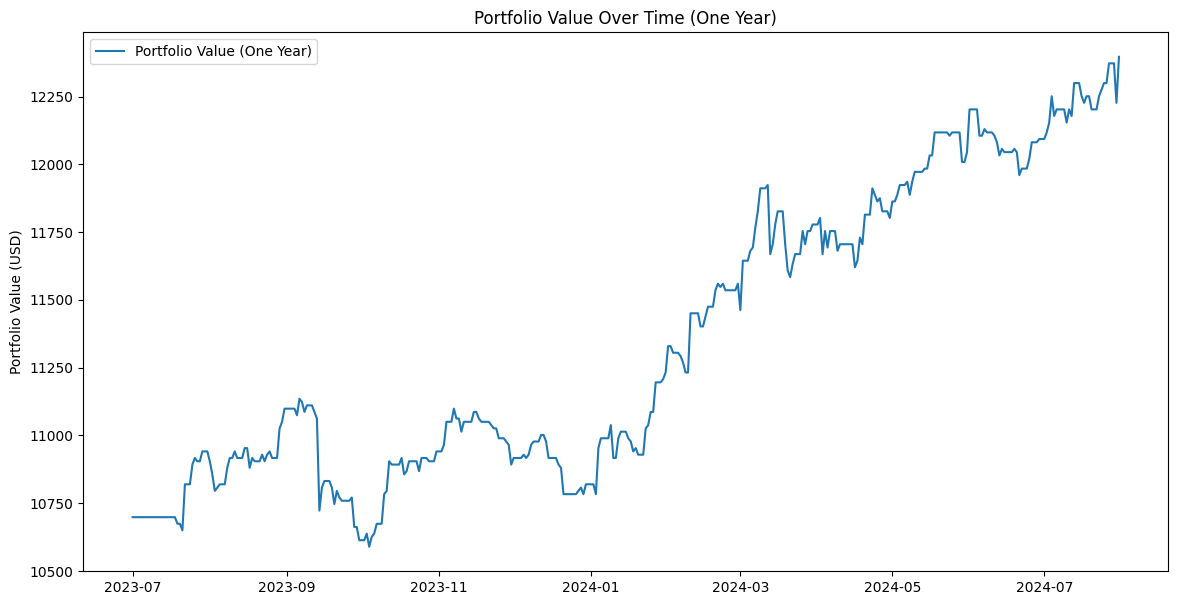

In [25]:
# Portfolio Strategy - using SMA for buy/sell signals
initial_capital = 10000  # Initial investment capital
data['Position'] = np.where(data['SMA_50'] > data['SMA_200'], 1, 0)  # Go long when 50-week SMA > 200-week SMA
data['Daily_Return'] = data['Returns'] * data['Position'].shift(1)  # Only earn returns when in the position
data['Portfolio_Value'] = initial_capital * (1 + data['Daily_Return']).cumprod()  # Calculate cumulative portfolio value

# Plot the Portfolio Value over the entire 20 years
plt.figure(figsize=(14,7))
plt.plot(data['Portfolio_Value'], label='Portfolio Value')
plt.title('Portfolio Value Over Time (20 Years)')
plt.ylabel('Portfolio Value (USD)')
plt.legend()
plt.show()

# Zoom into the portfolio value for the most recent year
plt.figure(figsize=(14,7))
plt.plot(data.loc['2023-07-01':'2024-08-01', 'Portfolio_Value'], label='Portfolio Value (One Year)')
plt.title('Portfolio Value Over Time (One Year)')
plt.ylabel('Portfolio Value (USD)')
plt.legend()
plt.show()


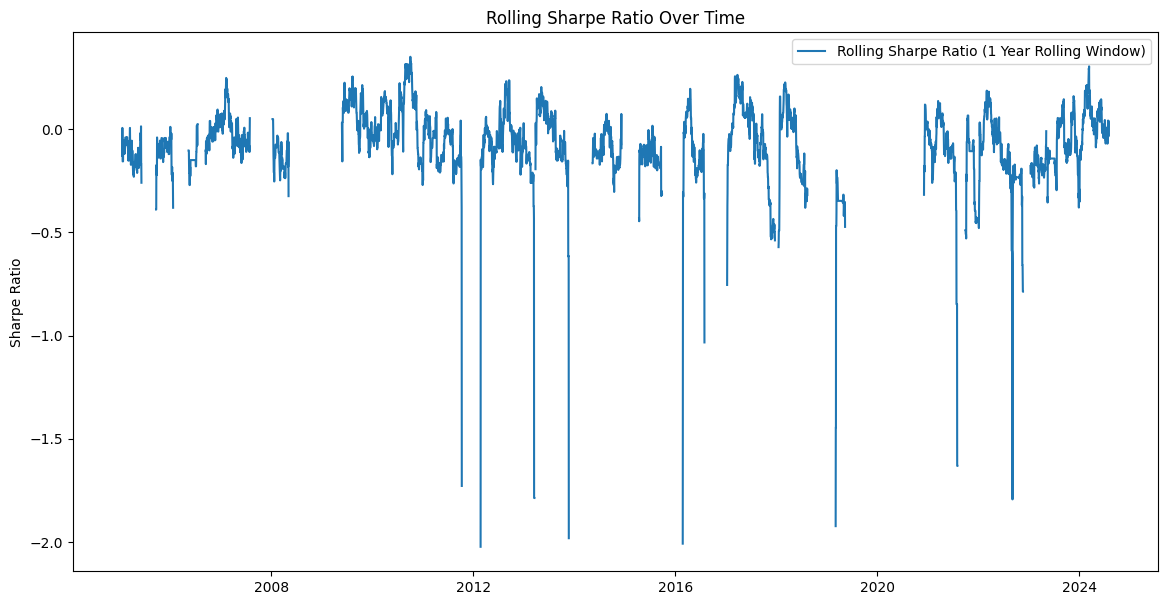

In [26]:
# Calculate Sharpe Ratio over time
data['Excess_Return'] = data['Daily_Return'] - 0.0003  # Assume a risk-free rate of 0.03% daily
data['Rolling_Sharpe'] = data['Excess_Return'].rolling(window=52).mean() / data['Excess_Return'].rolling(window=52).std()

# Plot the Sharpe ratio over the entire period
plt.figure(figsize=(14,7))
plt.plot(data['Rolling_Sharpe'], label='Rolling Sharpe Ratio (1 Year Rolling Window)')
plt.title('Rolling Sharpe Ratio Over Time')
plt.ylabel('Sharpe Ratio')
plt.legend()
plt.show()
